In [1]:
# MIT License
# 
# Copyright (c) 2018-2021 Pierre-Yves Taunay 
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
# 
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
# 
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

In [2]:
"""
File: Compute Accurate P.ipynb
Author: Pierre-Yves Taunay
Date: 2018

Calculate the accurate version of the pressure correlation, based on the results from the least-squares analysis.
"""

'\nFile: Compute Accurate P.ipynb\nAuthor: Pierre-Yves Taunay\nDate: 2018\n\nCalculate the accurate version of the pressure correlation, based on the results from the least-squares analysis.\n'

In [3]:
# Imports. 
%matplotlib inline
from sympy import *
init_printing(use_latex=True) # Make printing pretty
import mpmath

import cathode.constants as cs
import cathode.models.flow as cmf
import numpy as np

In [4]:
# Define symbols we will use
P,do,dc,q,mdot,Id,mu,mu0,eps,a,M,Lo,pi = symbols('P,d_o,d_c,q,\dot{m},I_d,\mu,\mu0,\epsilon,a,M,L_o,\pi',real=True,positive=True)

In [5]:
# Define the Pi products
PI1 = (P/(mu0*Id**2/(pi**2*do**2)))
PI2 = (do/dc)
PI3 = (do/Lo)
PI4 = ((mdot*q/(M*Id))**2 * (M*do/(mu0*q**2)))
PI5 = (mdot*a/(mu0*Id**2)) * 4*pi
PI6 = (q*eps/(do**2*Lo))*1/(mu0*Id**2/do**2) * (Lo/do) * 4*pi
PI7 = (mdot/(pi*(do/2)**2)*do/mu)





In [6]:
### LEAST SQUARES METHOD
### Exponents from the least squares analysis (beta vector)
Cfit_l = 10**7.0639102021599545
e1 = 0.78967753163551446
e2 = 0.22577194077376095
e3 = -0.26766913155894489
e4 = 0.81622790719254079
e5 = 0.25441804916181782
e6 = 0.40591950688859579  
    
### Power law
prod = (mu0*Id**2.0/(pi**2.0*do**2.0))*PI2**e1*PI3**e2*PI4**e3*PI5**e4*PI6**e5*PI7**e6

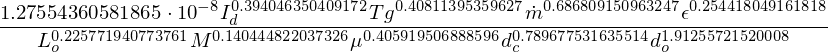

In [7]:
### Pressure expression without the speed of sound
gam,kb,Tg,Mamu,C_fit = symbols('\gamma,k_B,Tg,M_a,C_f',real=True,positive=True)
prod_noa = C_fit*prod.subs(a,sqrt(gam*kb/M*Tg))
#prod_noa = C_fit*prod.subs(a,sqrt(gam*cs.gas_constant*1e3/(M/cs.atomic_mass)*Tg))
prod_noa.subs([(mu0,4*np.pi*10**(-7)),(q,cs.e),(pi,np.pi),(gam,5/3),(kb,cs.Boltzmann),(C_fit,Cfit_l)])

In [8]:
### Same as above
prod_SI = prod_noa.subs([(mu0,4*np.pi*10**(-7)),(q,cs.e),(pi,np.pi),(gam,5/3),(kb,cs.Boltzmann),(C_fit,Cfit_l)])

In [9]:
### Pressure expression, in Torr
Locm,docm,dccm,mdsccm = symbols('L_{ocm},d_{ocm},d_{ccm},\dot{m}_s')
prod_Torr = prod_SI.subs([(mdot,mdsccm*0.07174496*M/cs.e),(M,Mamu*cs.atomic_mass),(do,docm*1e-2),(dc,dccm*1e-2),(Lo,Locm*1e-2)])*760/101325

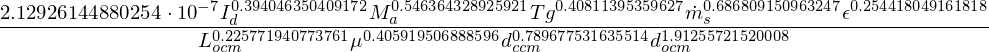

In [10]:
prod_Torr = prod_SI.subs([(mdot,mdsccm*0.07174496*M/cs.e),(M,Mamu*cs.atomic_mass),(do,docm*1e-2),(dc,dccm*1e-2),(Lo,Locm*1e-2)])*760/101325
prod_Torr

In [ ]:
### Below are example calculations using the correlations and other models

In [ ]:
prod_Torr.subs([(Id,10),(Tg,4443.663),(mdsccm,10),(Locm,0.074),(Mamu,131.293),(eps,12.1298),(mu,1.6538e-4),(dccm,0.38),(docm,0.104)])

In [ ]:
mu_n = cmf.viscosity(3000,'Xe',units='Pa-s')
prod_Torr.subs([(Id,22),(Tg,3000),(mdsccm,5.5),(Locm,0.074),(Mamu,131.293),(eps,12.128),(mu,mu_n),(dccm,1.27),(docm,0.25)])

In [ ]:
mu_n

In [ ]:
mdot_sccm = 5.5
M_n = 131.293*cs.atomic_mass
mdot_n = mdot_sccm *M_n/cs.e * cs.sccm2eqA
prod_SI.subs([(Id,22),(Tg,3000),(mdot,mdot_n),(Lo,0.74e-3),(M,M_n),(eps,12.128),(mu,mu_n),(dc,1.27e-2),(do,2.5e-3)])*760/101325

In [ ]:
prod_SI

In [ ]:
TgK = 4000
mu_n = cmf.viscosity(TgK,'Xe',units='Pa-s')
Idvec = np.arange(8.0,27.0,1)
resvec = np.zeros_like(Idvec)
for idx,Idv in enumerate(Idvec):
    resvec[idx] = prod_Torr.subs([(Id,Idv),(Tg,TgK),(mdsccm,5.5),(Locm,0.074),(Mamu,131.293),(eps,12.128),(mu,mu_n),(dccm,1.27),(docm,0.25)])
    print(Idv,resvec[idx])

In [ ]:
TgK = 4000
mu_n = cmf.viscosity(TgK,'Xe',units='Pa-s')
mdotvec = np.arange(4.0,11.0,1)
resvec = np.zeros_like(mdotvec)
for idx,mdot in enumerate(mdotvec):
    resvec[idx] = prod_Torr.subs([(Id,22),(Tg,TgK),(mdsccm,mdot),(Locm,0.074),(Mamu,131.293),(eps,12.128),(mu,mu_n),(dccm,1.27),(docm,0.25)])
    print(mdot,resvec[idx])

In [ ]:
mu_n = cmf.viscosity(4000,'Xe',units='Pa-s')
mdotvec = np.arange(4.0,12.0,1)
resvec = np.zeros_like(mdotvec)
for idx,mdot in enumerate(mdotvec):
    resvec[idx] = prod_Torr.subs([(Id,22),(Tg,4000),(mdsccm,mdot),(Locm,0.074),(Mamu,131.293),(eps,12.128),(mu,mu_n),(dccm,1.27),(docm,0.25)])
    print(mdot,resvec[idx])

In [ ]:
Cfit_l*1e-7

In [ ]:
# NSTAR at 4000 K
TgK = 4000
P_outlet = 0.0
mu_n = cmf.viscosity(TgK,'Xe',units='Pa-s')
Lo = 0.74 # mm
do = 1.02 # mm
dc = 3.8 # mm
Lc = 25.4 # mm
mdotvec = np.array([2.47,2.47,2.81,3.7])
for mdot in mdotvec:
    Po = cmf.poiseuille_flow(Lo*1e-3, do*1e-3, mdot, TgK, P_outlet, species='Xe')
    Pu = cmf.poiseuille_flow(Lc*1e-3, dc*1e-3, mdot, TgK, Po, species='Xe')
    Pud = cmf.modified_poiseuille_flow(Lo*1e-3,do*1e-3,mdot,TgK)
    print(Pu,Pud)


In [ ]:
# PLHC @ 2000 K
TgK = 3000
mu_n = cmf.viscosity(TgK,'Ar',units='Pa-s')
Idvec = np.arange(100,301,25,dtype=np.float64)
resvec = np.zeros_like(Idvec)
for idx,Idv in enumerate(Idvec):
    resvec[idx] = prod_Torr.subs([(Id,Idv),(Tg,TgK),(mdsccm,145),(Locm,0.15),(Mamu,39.948),(eps,15.7596),(mu,mu_n),(dccm,2.715),(docm,0.56)])
    print(Idv,resvec[idx])
    
Lo = 1.5e-3
do = 5.6e-3
mdot = 145
Ppois = cmf.poiseuille_flow(Lo, do, mdot, TgK, 0, species='Ar')
Pdom = cmf.modified_poiseuille_flow(Lo,do,mdot,TgK)
print(Ppois,Pdom)

In [ ]:
mu_n

In [ ]:
# NEXIS @ 3000 K
TgK = 3000
mu_n = cmf.viscosity(TgK,'Xe',units='Pa-s')
Idvec = np.linspace(8,26,10)
resvec = np.zeros_like(Idvec)
for idx,Idv in enumerate(Idvec):
    resvec[idx] = prod_Torr.subs([(Id,Idv),(Tg,TgK),(mdsccm,5.5),(Locm,0.074),(Mamu,131.293),(eps,12.198),(mu,mu_n),(dccm,1.27),(docm,0.275)])
    print(Idv,resvec[idx])
    
Lo = 0.74e-3
do = 2.75e-3
mdot = 5.5
Ppois = cmf.poiseuille_flow(Lo, do, mdot, TgK, 0, species='Ar')
Pdom = cmf.modified_poiseuille_flow(Lo,do,mdot,TgK)
print(Ppois,Pdom)